   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


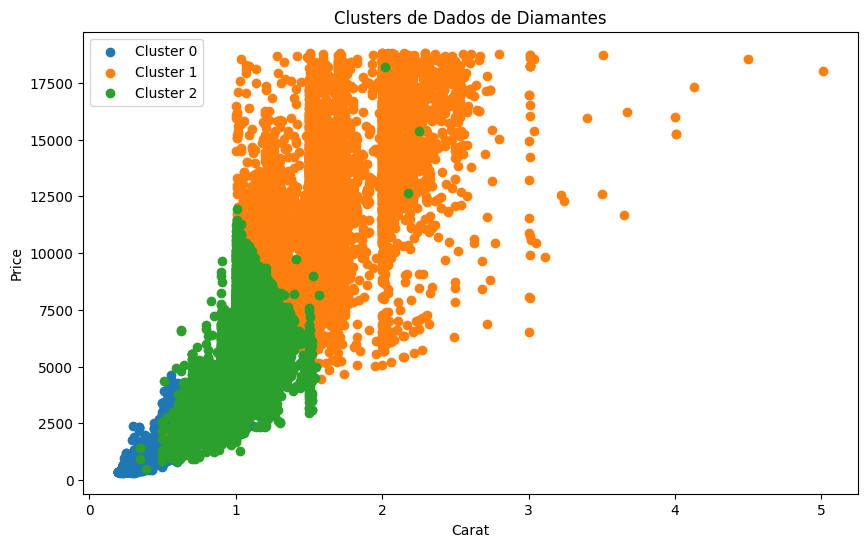

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

df = pd.read_csv("diamonds.csv")

print(df.head())

X = df.drop(['carat'], axis=1)

numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
numeric_transformer = StandardScaler()

categorical_features = ['cut', 'color', 'clarity']
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

X_processed = preprocessor.fit_transform(X)

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_processed)

df['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))

for cluster in range(n_clusters):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['carat'], cluster_data['price'], label=f'Cluster {cluster}')

plt.title('Clusters de Dados de Diamantes')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend()
plt.show()